In [226]:
'''
-----------------------------------------------------------------
analyze simulation results 

here we report settings of simulation parameters and
compute summary statistics for the coffee shop

an additional output file provides a case-by-case listing
of all events in the event log

-----------------------------------------------------------------
'''

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set the working directory
# 'simulation-event-log-10-hours-3-1-2-5-1-10'
#os.chdir('simulation-event-log-10-hours-3-1-2-5-1-10')

# list all the folders in the current directory
# containing '\\simulation-event-log-'
# no files are listed
folders = [f for f in os.listdir('.') if os.path.isdir(f) and f.startswith('simulation-event-log-')]

folders

['simulation-event-log-10-hours-1-1-2-5-1-10',
 'simulation-event-log-10-hours-2-1-2-5-1-10',
 'simulation-event-log-10-hours-3-1-2-5-1-10']

In [227]:
# read all the files 'simulation-event-log-0.csv', 'simulation-event-log-1.csv', ..., 'simulation-event-log-9.csv'
# inside the folders and combine them into a single data frame

event_log_df = pd.DataFrame()

for folder in folders:
    for i in range(100):
        file_name = folder + '/simulation-event-log-' + str(i) + '.csv'
        # add a new column 'sim_id' to the data frame
        # this column will store the simulation id
        event_log_temp = pd.read_csv(file_name)
        event_log_temp['sim_id'] = i
        # remove 'simulation-event-log-' from the folder name
        event_log_temp['sim_tag'] = folder[21:]
        event_log_df = pd.concat([event_log_df, event_log_temp], ignore_index=True)
    

# print the first few rows of the event log
event_log_df.tail()

,caseid,time,activity,sim_id,sim_tag
648139,620,35974,begin_service,99,10-hours-3-1-2-5-1-10
648140,621,35994,arrival,99,10-hours-3-1-2-5-1-10
648141,621,35994,join_queue,99,10-hours-3-1-2-5-1-10
648142,618,35996,end_service,99,10-hours-3-1-2-5-1-10
648143,621,35996,begin_service,99,10-hours-3-1-2-5-1-10


In [228]:
# pad the caseid with leading zeros to make it a 3-digit number
event_log_df['caseid'] = event_log_df['caseid'].astype(str).str.zfill(3)

# pad the sim_id with leading zeros to make it a 3-digit number
event_log_df['sim_id'] = event_log_df['sim_id'].astype(str).str.zfill(3)

# concatenate caseid with the sim_id and sim_tag
event_log_df['caseid'] = event_log_df['sim_id'].astype(str) + '|' + event_log_df['caseid'].astype(str) + '|' + event_log_df['sim_tag']

# remove from event_log_df when activity is 
# null_start_simulation or start_simulation 

event_log_df = event_log_df[(event_log_df['activity'] != 'null_start_simulation') & (event_log_df['activity'] != 'start_simulation')]

In [229]:
print(event_log_df.tail())

                               caseid   time       activity sim_id  \
648139  099|620|10-hours-3-1-2-5-1-10  35974  begin_service    099   
648140  099|621|10-hours-3-1-2-5-1-10  35994        arrival    099   
648141  099|621|10-hours-3-1-2-5-1-10  35994     join_queue    099   
648142  099|618|10-hours-3-1-2-5-1-10  35996    end_service    099   
648143  099|621|10-hours-3-1-2-5-1-10  35996  begin_service    099   

                      sim_tag  
648139  10-hours-3-1-2-5-1-10  
648140  10-hours-3-1-2-5-1-10  
648141  10-hours-3-1-2-5-1-10  
648142  10-hours-3-1-2-5-1-10  
648143  10-hours-3-1-2-5-1-10  


In [230]:
# show the dataframe with the event log
print(event_log_df.head(10))

                           caseid  time       activity sim_id  \
2   000|001|10-hours-1-1-2-5-1-10     2        arrival    000   
3   000|001|10-hours-1-1-2-5-1-10     2     join_queue    000   
4   000|001|10-hours-1-1-2-5-1-10     2  begin_service    000   
5   000|002|10-hours-1-1-2-5-1-10     4        arrival    000   
6   000|002|10-hours-1-1-2-5-1-10     4     join_queue    000   
7   000|001|10-hours-1-1-2-5-1-10    62    end_service    000   
8   000|002|10-hours-1-1-2-5-1-10    62  begin_service    000   
9   000|003|10-hours-1-1-2-5-1-10   111        arrival    000   
10  000|003|10-hours-1-1-2-5-1-10   111     join_queue    000   
11  000|004|10-hours-1-1-2-5-1-10   114        arrival    000   

                  sim_tag  
2   10-hours-1-1-2-5-1-10  
3   10-hours-1-1-2-5-1-10  
4   10-hours-1-1-2-5-1-10  
5   10-hours-1-1-2-5-1-10  
6   10-hours-1-1-2-5-1-10  
7   10-hours-1-1-2-5-1-10  
8   10-hours-1-1-2-5-1-10  
9   10-hours-1-1-2-5-1-10  
10  10-hours-1-1-2-5-1-10  
11  

In [231]:
# unpivot the event log by activity
event_log_df_unpivot = event_log_df.pivot_table(index='caseid', columns='activity', values='time')



# remove the level name for the columns
event_log_df_unpivot.columns.name = None

# move down the column names
event_log_df_unpivot.columns = ['arrival', 'balk', 'begin_service', 'end_service', 'join_queue']

# move caseid from index to a column
event_log_df_unpivot.reset_index(inplace=True)

# show the dataframe with the event log
event_log_df_unpivot.head(10)

# split the caseid into sim_id, sim_tag and caseid
event_log_df_unpivot[['sim_id', 'caseid', 'sim_tag']] = event_log_df_unpivot['caseid'].str.split('|', expand=True)

# sort the dataframe by sim_tag, sim_id and caseid
event_log_df_unpivot.sort_values(['sim_tag', 'sim_id', 'caseid'], inplace=True)

# calculate service_time as the difference between end_service and begin_service
event_log_df_unpivot['service_time'] = event_log_df_unpivot['end_service'] - event_log_df_unpivot['begin_service']

# calculate waiting_time as the difference between begin_service and join_queue
event_log_df_unpivot['waiting_time'] = event_log_df_unpivot['begin_service'] - event_log_df_unpivot['join_queue']

# determine last case sim_id
event_log_df_unpivot['last_case_sim_id'] = event_log_df_unpivot['sim_id'].shift(1)

# add the columnn last_case_arrival
# this column will store the time of the arrival of the previous caseid

event_log_df_unpivot['last_case_arrival'] = event_log_df_unpivot['arrival'].shift(1)

# if the last case sim_id is different from the current sim_id, then the last case arrival time is null
event_log_df_unpivot.loc[event_log_df_unpivot['sim_id'] != event_log_df_unpivot['last_case_sim_id'], 'last_case_arrival'] = np.nan

# calculate interarrival_time as the difference between arrival and last_case_arrival
event_log_df_unpivot['interarrival_time'] = event_log_df_unpivot['arrival'] - event_log_df_unpivot['last_case_arrival']

# if balk is not null, then the customer balked
event_log_df_unpivot['balked'] = event_log_df_unpivot['balk'].notnull()

# if end_service is not null, then the customer was served
event_log_df_unpivot['served'] = event_log_df_unpivot['end_service'].notnull()

# calculate the total time at the coffee shop as the difference between end_service and arrival
event_log_df_unpivot['total_time'] = event_log_df_unpivot['end_service'] - event_log_df_unpivot['arrival']

# show the dataframe with the event log
N  = 0
event_log_df_unpivot.iloc[N:N+10]


,caseid,arrival,balk,begin_service,end_service,join_queue,sim_id,sim_tag,service_time,waiting_time,last_case_sim_id,last_case_arrival,interarrival_time,balked,served,total_time
0,001,2.0,NaN,2.0,62.0,2.0,000,10-hours-1-1-2-5-1-10,60.0,0.0,None,NaN,NaN,False,True,60.0
3,002,4.0,NaN,62.0,318.0,4.0,000,10-hours-1-1-2-5-1-10,256.0,58.0,000,2.0,2.0,False,True,314.0
6,003,111.0,NaN,318.0,618.0,111.0,000,10-hours-1-1-2-5-1-10,300.0,207.0,000,4.0,107.0,False,True,507.0
9,004,114.0,NaN,618.0,678.0,114.0,000,10-hours-1-1-2-5-1-10,60.0,504.0,000,111.0,3.0,False,True,564.0
12,005,142.0,NaN,678.0,905.0,142.0,000,10-hours-1-1-2-5-1-10,227.0,536.0,000,114.0,28.0,False,True,763.0
15,006,188.0,NaN,905.0,1010.0,188.0,000,10-hours-1-1-2-5-1-10,105.0,717.0,000,142.0,46.0,False,True,822.0
18,007,265.0,NaN,1010.0,1181.0,265.0,000,10-hours-1-1-2-5-1-10,171.0,745.0,000,188.0,77.0,False,True,916.0
21,008,369.0,NaN,1181.0,1450.0,369.0,000,10-hours-1-1-2-5-1-10,269.0,812.0,000,265.0,104.0,False,True,1081.0
24,009,442.0,NaN,1450.0,1539.0,442.0,000,10-hours-1-1-2-5-1-10,89.0,1008.0,000,369.0,73.0,False,True,1097.0
27,010,515.0,NaN,1539.0,1715.0,515.0,000,10-hours-1-1-2-5-1-10,176.0,1024.0,000,442.0,73.0,False,True,1200.0


In [232]:
# create a new folder '001. Pictures' if it does not exist
if not os.path.exists('001. Pictures'):
    os.makedirs('001. Pictures')

# save the histogram of the total time at the coffee shop
# inside the folder '001. Pictures'
# as 'histogram-total-time.png'
plt.figure(figsize=(10, 5))
# divide the total time by 60 to convert it to minutes
event_log_df_unpivot['total_time'] = event_log_df_unpivot['total_time'] / 60
sns.histplot(data=event_log_df_unpivot, x='total_time', hue='sim_tag', bins=50, kde=True)
plt.title('Histogram of the total time at the coffee shop')
plt.xlabel('Total time at the coffee shop (minutes)')
plt.ylabel('Frequency')

plt.savefig('001. Pictures/histogram-total-time.png')
plt.show()

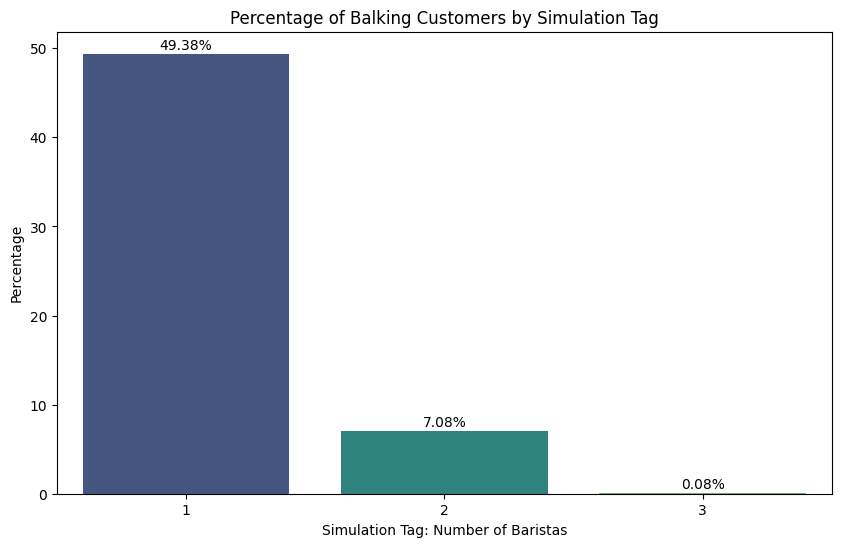

In [234]:
# display the number of balking customers by simulation tag
balk_count = event_log_df_unpivot.groupby('sim_tag')['balked'].sum()


# number of rows in the event log by simulation tag
event_count = event_log_df_unpivot.groupby('sim_tag').size()

balk_percentage = balk_count/ event_count * 100

# clean content of sim_tag
# remove 10-hours- from sim_tag
# and remove -1-2-5-1-10
balk_percentage.index = balk_percentage.index.str.replace('10-hours-', '')
balk_percentage.index = balk_percentage.index.str.replace('-1-2-5-1-10', '')

# display the percentage of balking customers by simulation tag
balk_percentage

# show bar plot of the percentage of balking customers by simulation tag
# add hue to the bars
plt.figure(figsize=(10, 6))
sns.barplot(x=balk_percentage.index, y=balk_percentage.values, palette='viridis', hue = balk_percentage.index)
plt.title('Percentage of Balking Customers by Simulation Tag')
plt.ylabel('Percentage')
plt.xlabel('Simulation Tag: Number of Baristas')
# add the percentage values on top of the bars
for i in range(len(balk_percentage)):
    plt.text(i, balk_percentage.values[i] + 0.5, str(round(balk_percentage.values[i], 2)) + '%', ha='center')
# export the plot
plt.savefig('001. Pictures/balk_percentage.png')
plt.show()

In [245]:
# disply the statistics of the total time at the coffee shop by simulation tag
total_time_stats = event_log_df_unpivot.groupby('sim_tag')['total_time'].describe()

# remove count
total_time_stats.drop('count', axis=1, inplace=True)

# clean content of sim_tag
# remove 10-hours- from sim_tag
# and remove -1-2-5-1-10
total_time_stats.index = total_time_stats.index.str.replace('10-hours-', '')
total_time_stats.index = total_time_stats.index.str.replace('-1-2-5-1-10', '')

# make the statistics more readable
# using apply over all the columns
total_time_stats = total_time_stats.map(lambda x: round(x, 2))

# move down the column names
total_time_stats.columns = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

# reset the index
total_time_stats.reset_index(inplace=True)

# display the statistics of the total time at the coffee shop by simulation tag
total_time_stats

# show the markdown table of the statistics of the total time at the coffee shop by simulation tag
print(total_time_stats.to_markdown(index=False))

# save the markdown table of the statistics of the total time at the coffee shop by simulation tag
# inside the folder '001. Pictures'
# as 'total-time-stats.md'
with open('001. Pictures/total-time-stats.md', 'w') as f:
    f.write(total_time_stats.to_markdown(index=False))



|   sim_tag |   mean |   std |   min |   25% |   50% |   75% |   max |
|----------:|-------:|------:|------:|------:|------:|------:|------:|
|         1 |  20.31 |  5.36 |     1 | 17.08 | 20.4  | 23.8  | 41.27 |
|         2 |   7.06 |  3.81 |     1 |  4.02 |  6.85 |  9.82 | 21.98 |
|         3 |   2.77 |  1.8  |     1 |  1.15 |  2.25 |  3.92 | 14.8  |
